In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [79]:
# 期待収益率、リスク
mu = 0.05
sigma = 0.1

# チャート表示のパラメタ
year = 10
ganpon = 100
unit = 50

# 連続福利収益率の平均標準偏差に変換
s = np.sqrt(np.log(1+(sigma/(1+mu))**2)) 
r = (np.log(1+mu)-(s**2)/2) 
# ラッパデータ作成
rappa = pd.DataFrame(np.arange(year*unit+1),columns=['year'])
rappa['year'] = rappa['year']/unit
rappa['mean'] = (rappa['year'])*r
rappa['sd'] = np.sqrt(rappa['year'])*s
rappa['m3'] = ganpon*np.exp(rappa['mean']-3*rappa['sd'])
rappa['m2'] = ganpon*np.exp(rappa['mean']-2*rappa['sd'])
rappa['m1'] = ganpon*np.exp(rappa['mean']-1*rappa['sd'])
rappa['c'] = ganpon*np.exp(rappa['mean']-0*rappa['sd'])
rappa['p1'] = ganpon*np.exp(rappa['mean']+1*rappa['sd'])
rappa['p2'] = ganpon*np.exp(rappa['mean']+2*rappa['sd'])
rappa['p3'] = ganpon*np.exp(rappa['mean']+3*rappa['sd'])

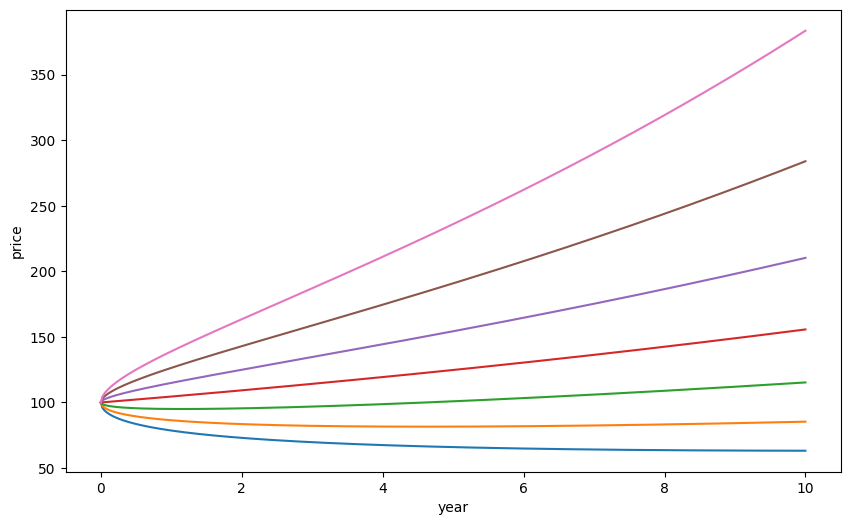

In [81]:
# チャートを表示
rlist = ['m3','m2','m1','c','p1','p2','p3']

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, xlabel='year', ylabel='price')

ax.plot(rappa['year'] ,rappa[rlist])

fig.savefig('rappa.png')

In [75]:
rappa.iloc[-1,:]

year    500.000000
mean      0.442755
sd        0.300490
m3       63.209566
m2       85.365784
m1      115.288200
c       155.699021
p1      210.274644
p2      283.980115
p3      383.520829
Name: 500, dtype: float64

In [76]:
# シミュレーション
sim_num = 10000
ranmat = np.random.normal(r/unit,s/np.sqrt(unit),(year*unit,sim_num))
expmat = np.exp(ranmat)
primat = np.cumprod(expmat,axis=0)*ganpon

In [77]:
last_price = primat[-1,:]

In [78]:
percentile_03 = np.percentile(last_price, 2.275)
percentile_16 = np.percentile(last_price, 15.865)
percentile_50 = np.percentile(last_price, 50)
percentile_84 = np.percentile(last_price, 100-15.865)
percentile_97 = np.percentile(last_price, 100-2.275)
print(percentile_03)
print(percentile_16)
print(percentile_50)
print(percentile_84)
print(percentile_97)

85.5879642972585
115.46427394252103
156.13897110581735
210.3914197904989
286.3683292142056


In [38]:
p1=print(expmat.mean())

1.0038747942395958


In [39]:
np.savetxt('expmat.csv', expmat, delimiter=',')